In [10]:
# Do not change the path of this notebook (do not use %cd)
from PIL import Image

print("GTA5 dataset")
img = Image.open('/home/mateusw/repos/domain_adaptation_semantic_segmentation/data/GTA5/labels/00001.png')
print(img.mode)

print("Cityscapes dataset")
img = Image.open('data/Cityscapes/Cityspaces/gtFine/train/hanover/hanover_000000_000164_gtFine_labelTrainIds.png')
print(img.mode)
print(img.size)

GTA5 dataset
P
Cityscapes dataset
L
(2048, 1024)


# Prepare Enviroment

In [2]:

#!git clone https://github.com/MateusWiteck/domain_adaptation_semantic_segmentation.git


In [11]:
!pip install -U fvcore

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 648.3 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached PyYAML-6.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Using cached PyYAML-6.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (767 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61441 sha256=2e767b3c666c4bfa420400e309c66966a57d77e5d5ff06b89269a7c97d09571e
  Stored in directory: /home/mateusw/.cache/pip/wheels/ed/9f/a5/e4f5b27454ccd4596bd8b62

In [4]:
# Download Citiescapes Dataset:
#!pip install -q gdown
#!gdown --id 1Qb4UrNsjvlU-wEsR9d7rckB0YS_LXgb2 --output Cityscapes.zip
#!unzip Cityscapes.zip -d domain_adaptation_semantic_segmentation/data/


In [5]:
# Download GTA Dataset:
#!pip install -q gdown
#!gdown --id 1xYxlcMR2WFCpayNrW2-Rb7N-950vvl23 --output GTA5.zip
#!unzip GTA5.zip -d domain_adaptation_semantic_segmentation/data/


# Dataset and Dataloader

Here we should:
- Convert the GTA5 labels to the same format of the Cityscapes dataset (https://github.com/sarrrrry/PyTorchDL_GTA5/blob/master/pytorchdl_gta5/labels.py)
- Create the Datasets class for each one
- Create the DataLoader
- Define the train test val ? division

## Cityscapes

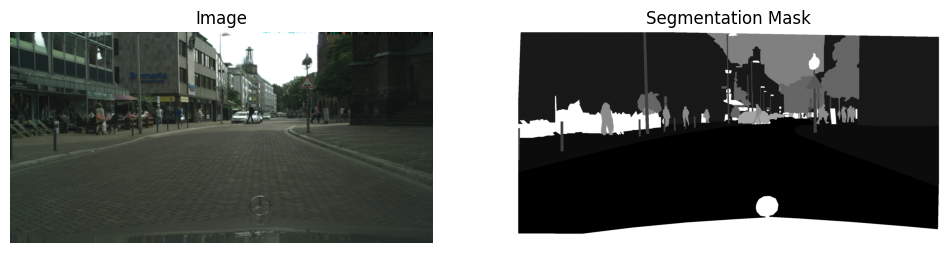

NameError: name 'visualize_label_with_colors' is not defined

In [8]:
from datasets import CityScapes 

import matplotlib.pyplot as plt
import random
from torchvision import transforms

# Path to your dataset (adjust here)
root_dir = 'data/Cityscapes/Cityspaces'

# Simple transforms (ToTensor only for the image)
transform = transforms.ToTensor()

# Instantiate the dataset
dataset = CityScapes(root_dir=root_dir, split='train', transform=transform, label_transform=None)

# Select a random index
idx = random.randint(0, len(dataset) - 1)
image, label_tensor = dataset[idx]

# Convert the label to numpy for display
label_np = label_tensor.numpy()

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image.permute(1, 2, 0))  # Convert from [C, H, W] to [H, W, C]
axes[0].set_title('Image')
axes[0].axis('off')

axes[1].imshow(label_np, cmap='gray', vmin=0, vmax=20) 
axes[1].set_title('Segmentation Mask')
axes[1].axis('off')

plt.show()

#print("Output in numpy array format:")
#print(label_np)
#print("Output in tensor format:")   
#print(label_tensor)
#print("Shape of label tensor:")
#print(label_tensor.shape)

# Plot the image in the color pattern given by the GTA dataset
visualize_label_with_colors(label_np)

# Print dataset information
print(f"Dataset length: {len(dataset)}")
print(f"Image shape: {image.shape}")
print(f"Label shape: {label_tensor.shape}")



## GTA5


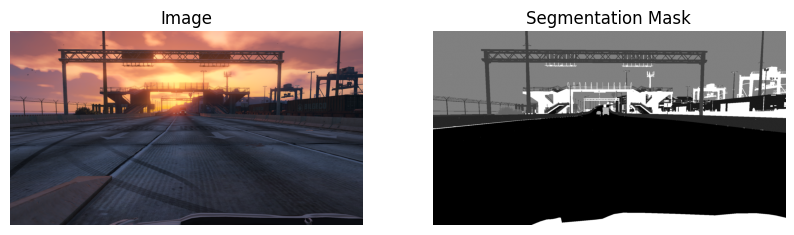

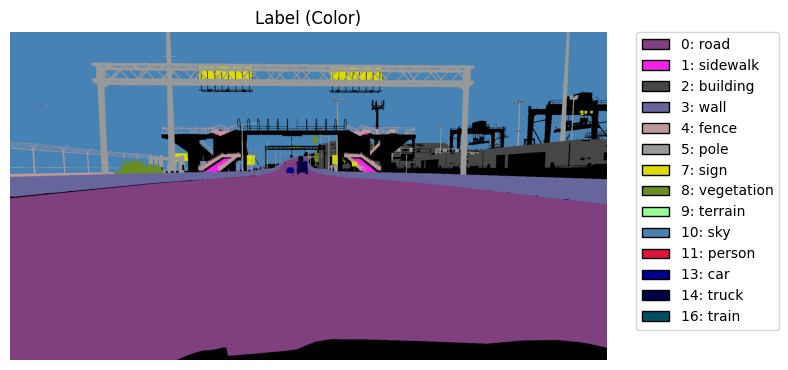

Dataset length: 2500
Image shape: torch.Size([3, 1052, 1914])
Label shape: torch.Size([1052, 1914])


In [4]:
%run datasets/gta5.py



/home/mateusw/repos/domain_adaptation_semantic_segmentation/transformations/test_script.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('gray', 21)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9637811..2.5877123].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5877123].


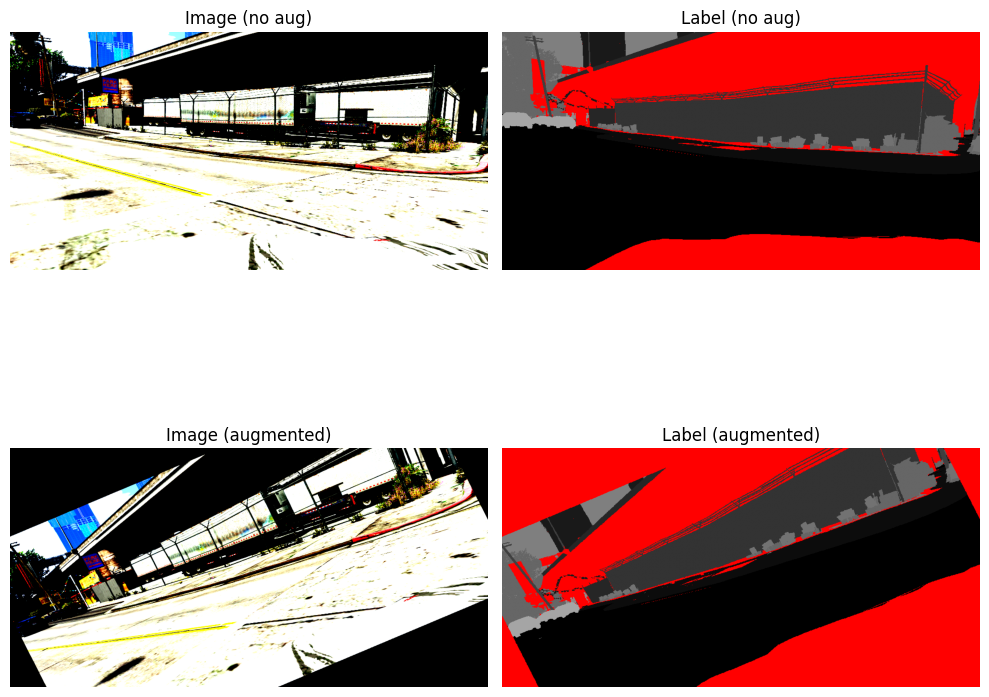

In [3]:
%run transformations/test_script.py

In [3]:
#%cd domain_adaptation_semantic_segmentation/
#!git pull
#!git fetch --all
#%cd ..

# Task 2


## Classic semantic segmentation network.
For this step, you have to train a classic segmentation network (DeepLabV2 [2]) on the Cityscapes dataset.
- Dataset: Cityscapes [5]
- Training epochs: 50
- Training resolution (Cityscapes): 1024x512
- Test resolution (Cityscapes): 1024x512
- Backbone: R101 (pre-trained on ImageNet) [2]
- Semantic classes: 19
- Metrics: Mean Intersection over Union (mIoU) [read this to understand the metrics], latency, FLOPs, number of parameters.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms

# Clean the enviroment
torch.cuda.empty_cache()
torch.cuda.ipc_collect()

from datasets.cityscapes import CityScapes
from models.deeplabv2.deeplabv2 import get_deeplab_v2

# === Hyperparameters ===
num_classes_cs = 19
batch_size_cs = 2
num_workers_cs = 2
learning_rate_cs = 2.5e-4
num_epochs_cs = 40

if torch.cuda.is_available():
    device_cs = torch.device('cuda')
else:
    raise Exception('No GPU available')

# === Dataset & Dataloader ===
transform_cs = transforms.Compose([
    transforms.Resize((64, 64)),  # or smaller
    transforms.ToTensor(),
    transforms.Normalize(mean=[.485, .456, .406], std=[.229, .224, .225])
])
dataset_cs = CityScapes(
    root_dir='data/Cityscapes/Cityspaces',
    split='train',
    transform=transform_cs,
    label_transform=None
)
dataloader_cs = DataLoader(
    dataset_cs,
    batch_size=batch_size_cs,
    shuffle=True,
    num_workers=num_workers_cs,
    pin_memory=True
)

# === Model ===
model_cs = get_deeplab_v2(num_classes=num_classes_cs, pretrain=False)
model_cs = model_cs.to('cuda')

# === Loss & Optimizer ===
criterion_cs = nn.CrossEntropyLoss(ignore_index=255)
"""optimizer_cs = optim.SGD(
    model_cs.optim_parameters(learning_rate_cs),
    lr=learning_rate_cs,
    momentum=0.9,
    weight_decay=0.0005
)"""
optimizer_cs = optim.SGD(
    model_cs.parameters(),
    lr=learning_rate_cs,
    momentum=0.9,
    weight_decay=0.0005
)

# === Training Loop ===
from train import train

metrics_train_task2a = train(
    model_cs, 
    dataloader_cs, 
    optimizer_cs, 
    criterion_cs, 
    device_cs, 
    num_classes_cs, 
    config_cs, 
    "Task2a", 
    project="cityscapes-segmentation"
)


# === Save the model ===
torch.save(model_cs.state_dict(), 'final_models/task2a.pth')

RuntimeError: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero.

In [5]:

import gc
gc.collect()

# Clean the enviroment
torch.cuda.empty_cache()
torch.cuda.ipc_collect()

RuntimeError: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero.

In [7]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121



Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 11.5 MB/s eta 0:00:0000:010:01
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 34.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 36.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 45.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 36.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 36.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 36.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 31.2 MB/s eta 0:00:0000:0100:01
INFO: pip is still looking at multiple versions of torchaudio to determine which version

## Real-time semantic segmentation network.
For this step, you have to train a real-time segmentation network (BiSeNet [3]) on the Cityscapes dataset. 
Dataset: Cityscapes [5]
- Training epochs: 50
- Training resolution (Cityscapes): 1024x512
- Test resolution (Cityscapes): 1024x512
- Backbone: ResNet18 (pre-trained on ImageNet) [3]
- Semantic classes: 19
- Metrics: mIoU, latency, FLOPs, number of parameters.

/tmp/ipykernel_6860/2732669951.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('gray', 21)  # 21 = 0 to 20
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5185375..2.6399999].


Before transform label
<PIL.Image.Image image mode=L size=1914x1052 at 0x713E528BF860>
Dataset transformated label
tensor([[  9,   9,   9,  ...,  10,  10,  10],
        [  9,   9,   9,  ...,  10,  10,  10],
        [  9,   9,   9,  ...,  10,  10,  10],
        ...,
        [  0,   0,   0,  ..., 255, 255, 255],
        [  0,   0,   0,  ..., 255, 255, 255],
        [  0,   0,   0,  ..., 255, 255, 255]], dtype=torch.uint8)
final label
[[  9   9   9 ...  10  10  10]
 [  9   9   9 ...  10  10  10]
 [  9   9   9 ...  10  10  10]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
Unique label values: [  0   2   3   4   5   7   8   9  10  11  13  14  15  17 255]


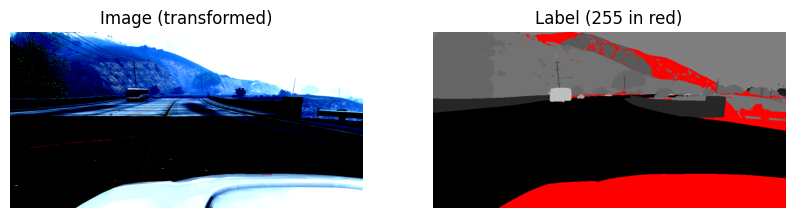

In [4]:
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

from transformations import RandomBlurTransform  # or RandomEraseTransform
from datasets.gta5 import GTA5

# Instantiate transform and dataset
transform = RandomBlurTransform(p=0.5)
dataset_aug = GTA5(root_dir='data/GTA5', transform=transform)

# Load one sample
dataloader = DataLoader(dataset_aug, batch_size=1, shuffle=True)
image, label = next(iter(dataloader))

# Prepare for visualization
image_np = image[0].permute(1, 2, 0).numpy()
label_np = label[0].numpy()
print("final label")
print(label_np)

# Print label range to confirm presence of ignore index
print("Unique label values:", np.unique(label_np))

# Setup colormap for labels: 0–20 normal, 255 shown as red (using 'over' range)
cmap = plt.cm.get_cmap('gray', 21)  # 21 = 0 to 20
cmap.set_over('red')  # Anything > 20 will be red (e.g., 255)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# RGB Image
axes[0].imshow(image_np)
axes[0].set_title('Image (transformed)')
axes[0].axis('off')

# Label with ignore in red
im = axes[1].imshow(label_np, cmap=cmap, vmin=0, vmax=20)
axes[1].set_title('Label (255 in red)')
axes[1].axis('off')

plt.show()


In [ ]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

from transformations import RandomFlipTransform, NoTransform, RandomRotationTransform, RandomEraseTransform, RandomBlurTransform
from datasets.gta5 import GTA5

# Fix seed for reproducibility
torch.manual_seed(0)

# === With augmentation ===
transform_aug = RandomRotationTransform(p=1.0, rotation_limit=70)
dataset_aug = GTA5(root_dir='data/GTA5', transform=transform_aug)

# Load specific sample (e.g., index 0)
image_aug, label_aug = dataset_aug[1]

# === Without augmentation ===
transform_none = NoTransform()
dataset_plain = GTA5(root_dir='data/GTA5', transform=transform_none)

# Load the same sample (index 0)
image_plain, label_plain = dataset_plain[1]

# === Convert to numpy for plotting ===
image_aug_np = image_aug.permute(1, 2, 0).numpy()
label_aug_np = label_aug.numpy()

image_plain_np = image_plain.permute(1, 2, 0).numpy()
label_plain_np = label_plain.numpy()

# === Visualization ===
cmap = plt.cm.get_cmap('gray', 21)
cmap.set_over('red')

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(image_plain_np)
axes[0, 0].set_title("Image (no aug)")
axes[0, 0].axis("off")

axes[0, 1].imshow(label_plain_np, cmap=cmap, vmin=0, vmax=20)
axes[0, 1].set_title("Label (no aug)")
axes[0, 1].axis("off")

axes[1, 0].imshow(image_aug_np)
axes[1, 0].set_title("Image (augmented)")
axes[1, 0].axis("off")

axes[1, 1].imshow(label_aug_np, cmap=cmap, vmin=0, vmax=20)
axes[1, 1].set_title("Label (augmented)")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()


TypeError: RandomRotationTransform.__init__() missing 1 required positional argument: 'rotation_limit'